# Introduccion a la vision por computadora

## 1. Operaciones basicas con imagenes

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
# Lectura de una imagen
img = cv.imread('dogs2.jpg')

In [ ]:
#cv.imshow('Imagen 1',img)
#cv.waitKey()

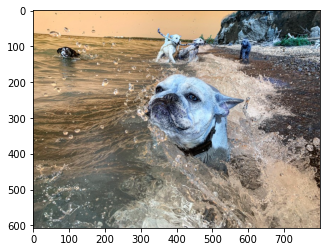

In [7]:
plt.imshow(img)

Espacios de color

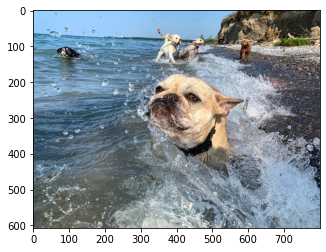

In [8]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [9]:
img = cv.imread('dogs2.jpg', 0)

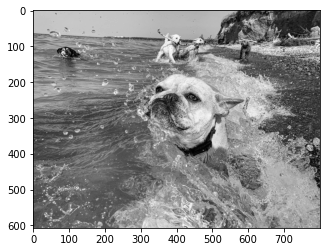

In [14]:
plt.imshow(img, cmap='gray')

Leer y guardar imagenes

In [17]:
cv.imwrite('./dogs_bn.jpg',img)

True

In [18]:
cv.imwrite('./dogs_bn.png',img)

True

In [19]:
cv.imwrite('./dogs_bn2.png',img,[cv.IMWRITE_PNG_COMPRESSION])

True

Separar canales de las imagenes

In [21]:
img = cv.imread('dogs2.jpg')

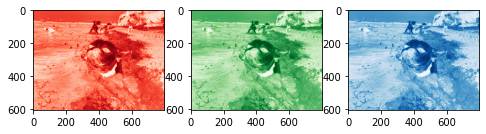

In [26]:
# Forma 1
b,g,r = cv.split(img)
fig, ax = plt.subplots(1,3, figsize=(8,10))
ax[0].imshow(r, cmap='Reds')
ax[1].imshow(r, cmap='Greens')
ax[2].imshow(r, cmap='Blues')

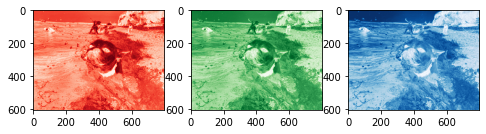

In [27]:
# Forma 2
fig, ax = plt.subplots(1,3, figsize=(8,10))
ax[0].imshow(img[:,:,2], cmap='Reds')
ax[1].imshow(img[:,:,1], cmap='Greens')
ax[2].imshow(img[:,:,0], cmap='Blues')

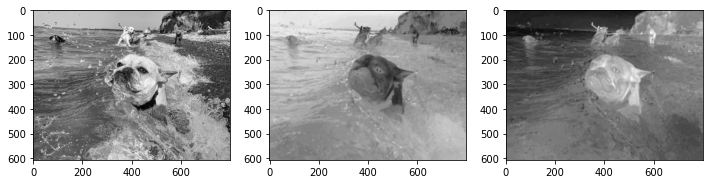

In [29]:
# Espacio YUV
img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)
fig, ax = plt.subplots(1,3, figsize=(12,6))
ax[0].imshow(img_yuv[:,:,0], cmap='gray')
ax[1].imshow(img_yuv[:,:,1], cmap='gray')
ax[2].imshow(img_yuv[:,:,2], cmap='gray')

## 2. Transformaciones Geometricas

## 2.1. Traslacion

In [30]:
import numpy as np

In [32]:
img = cv.imread('dogs2.jpg')
nr, nc = img.shape[:2]

In [34]:
T = np.float32([[1, 0, 100], [0, 1, 200]])
img_trasl = cv.warpAffine(img, T, (nc, nr), cv.INTER_LINEAR)

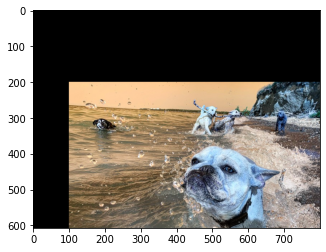

In [35]:
plt.imshow(img_trasl)

## 2.2. Rotacion

In [36]:
T = cv.getRotationMatrix2D((nc/2, nr/2), 45, 0.8)
img_rot = cv.warpAffine(img, T, (nc, nr), cv.INTER_LINEAR)

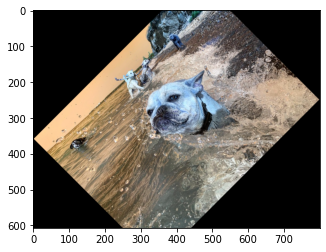

In [37]:
plt.imshow(img_rot)

# 2.3. Escalamiento

In [38]:
img_sc = cv.resize(img,None, fx=0.8, fy=1.2, 
                   interpolation=cv.INTER_CUBIC)

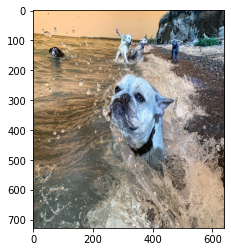

In [39]:
plt.imshow(img_sc)

## 2.4. Transformaciones afines

In [40]:
src_points = np.float32([[0,0], [nc-1,0], [0, nr-1]])
dst_points = np.float32([[0,0], [nc-1,100], [200, nr-1]])

In [41]:
T = cv.getAffineTransform(src_points,dst_points)
img_aft = cv.warpAffine(img, T, (nc, nr), cv.INTER_LINEAR)

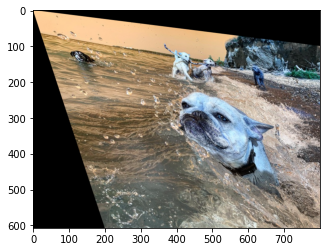

In [42]:
plt.imshow(img_aft)

In [43]:
src_points = np.float32([[0,0], [nc-1,0], [0, nr-1]])
dst_points = np.float32([[nc-1,0], [0,0], [nc-1, nr-1]])

In [44]:
T = cv.getAffineTransform(src_points,dst_points)
img_aft = cv.warpAffine(img, T, (nc, nr), cv.INTER_LINEAR)

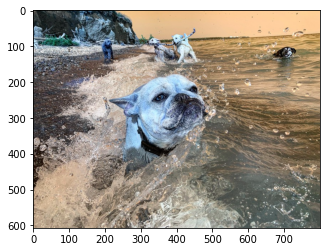

In [45]:
plt.imshow(img_aft)

## 2.5. Transformaciones proyectivas

In [46]:
src_points = np.float32([[0,0], [nc-1,0], [0, nr-1], [nc-1, nr-1]])
dst_points = np.float32([[0.2*nc,0], [0.8*nc,0], [0, nr-1], [nc-1, nr-1]])

In [49]:
T = cv.getPerspectiveTransform(src_points, dst_points)
img_pt = cv.warpPerspective(img, T, (nc, nr), cv.INTER_LINEAR)

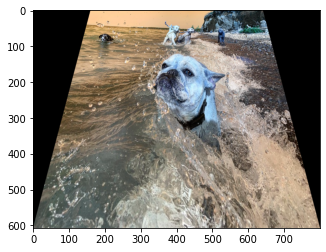

In [50]:
plt.imshow(img_pt)

## 3. Filtros

In [53]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [52]:
kernel_I = np.array([[0,0,0],[0,1,0],[0,0,0]])
kernel_b3 = np.ones((3,3), np.float32)/9.
kernel_b15 = np.ones((15,15), np.float32)/225.

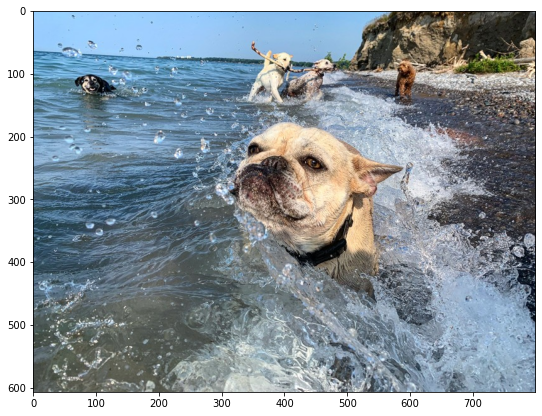

In [54]:
img_kI = cv.filter2D(img,-1, kernel_I)
plt.figure(figsize=(9,9))
plt.imshow(img_kI)

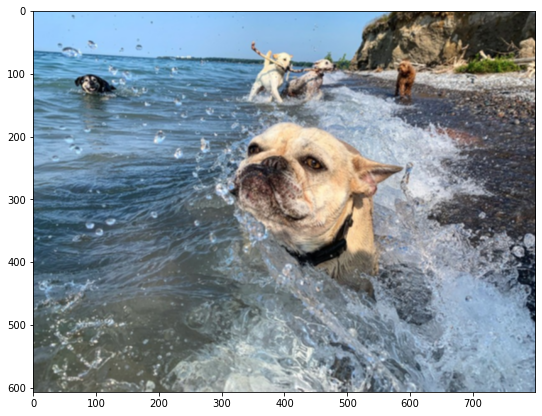

In [55]:
img_kb3 = cv.filter2D(img,-1, kernel_b3)
plt.figure(figsize=(9,9))
plt.imshow(img_kb3 )

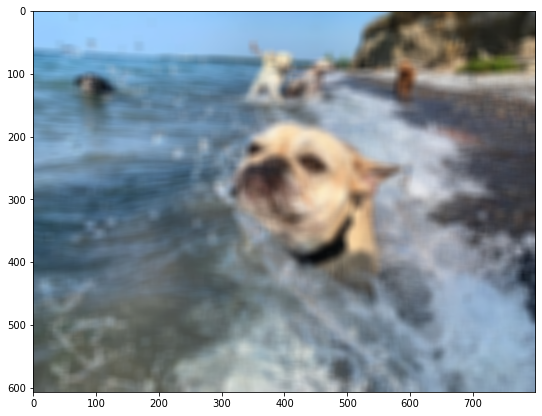

In [56]:
img_kb15 = cv.filter2D(img,-1, kernel_b15)
plt.figure(figsize=(9,9))
plt.imshow(img_kb15)

## 4. Deteccion de bordes